In [82]:
%reset
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%qtconsole

In [83]:
%matplotlib inline

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import os

from dataIO.span import span
from dataIO.fn_add_subfix import fn_add_subfix

from IPython.display import display
from plotting.backends import maximize

In [85]:
pwd

'C:\\Users\\kovor\\Documents\\python\\pyXTel\\pyProfile\\test'

# Test pyProfile

## New class implementation (2020/06/25)

Test new implementation of class from profile methods to objects, in analogy to what is done with pySurf.
Here we test and document.

In [86]:
from pyProfile.profile_class import Profile

In [17]:
from pyProfile.profile import make_signal

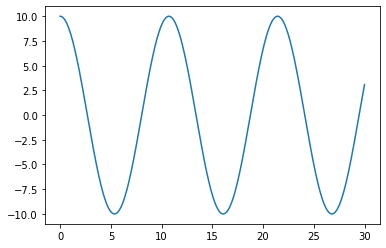

In [18]:
x,y=make_signal(amp=10.,L=30.,N=501,nwaves=2.8,ystartend=(0,0),noise=0)
plt.plot(x,y)

In [19]:
P = Profile(x,y,units=['mm','nm'])

In [20]:
P.std()

6.9927959143129295

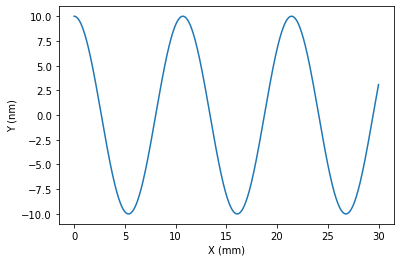

In [21]:
P.plot()

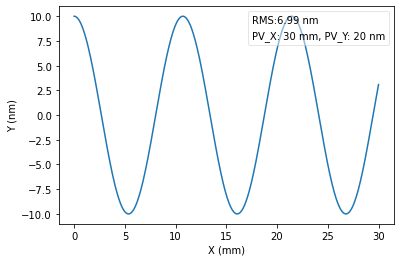

In [22]:
P = Profile(x,y,units=['mm','nm'])
P.plot(stats=1,loc=1)

In [23]:
#TODO: test remove_nan_ends.
#TODO: test register_profile.

# Test profile functions

## Test make_signal

In [25]:
%matplotlib

Creo un segnale (reale). Ne creo una copia sottocampionata per test, ovviamente sono tutti valori reali.

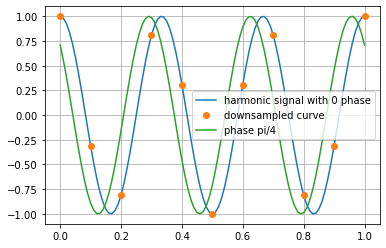

In [26]:
L=1
N=11

plt.clf()
x,y=make_signal(1,L=1,N=101,nwaves=3)
plt.plot(x,y,label='harmonic signal with 0 phase')
x,y=make_signal(1,L=1,N=N,nwaves=3)
plt.plot(x,y,'o',label='downsampled curve')
x,y=make_signal(1,L=1,N=101,nwaves=3,phase=np.pi/4)
plt.plot(x,y,label='phase pi/4')
plt.grid(1)
plt.legend(loc=0)

Quindi ora posso creare segnali complessi arbitrari usando due segnali con stessa frequenza e fase diversa su reale e immaginario.

Questo ovviamente significa che posso usare una serie di ca N/2 armoniche per descrivere interamente il segnale, a patto di fornire anche la fase.

### Option `minus_one`

In [27]:

plt.clf()
A=make_signal(1,L=1,N=N,nwaves=nwaves)
plt.plot(*A)
print(A[0].shape)
print(A[1].shape)

<Figure size 432x288 with 0 Axes>

In [28]:
# redo plot adding "minux_one option"
plt.clf()
plt.plot(*A)

plt.plot(*(make_signal(1,L=1,N=N,nwaves=nwaves,minus_one=True)),'o')

plt.grid(1)
plt.xlim([0.97,1.01])
plt.ylim([-0.2,0.1])
plt.show()

<Figure size 432x288 with 0 Axes>

In [87]:
# riproduce esempio di matlab da:
# https://it.mathworks.com/help/matlab/data_analysis/detrending-data.html
#
#

fn = r'C:\Users\kovor\Documents\python\pyXTel\pyProfile\test\matlab-normaldata.dat'


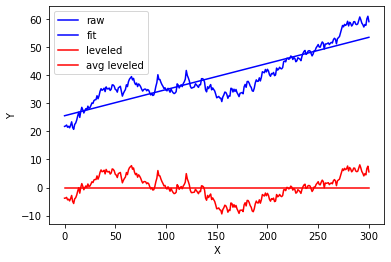

In [101]:
y = np.genfromtxt(fn)
p=Profile(np.arange(len(y)),y)
p.plot(color='b',label = 'raw')
(p-p.level()).plot(color='b',label = 'fit')
p.level().plot(color='r',label = 'leveled')
plt.plot(p.x,p.y*0+p.level().y.mean(),color='r',label = 'avg leveled')
plt.legend()

In [ ]:
# makes a 2d surface from matlab data 
# fit 2D
# estrai profili dritti o in diagonale
